In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as ols
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [16]:
!pip install statsmodels.outliers_influence

  Could not find a version that satisfies the requirement statsmodels.outliers_influence (from versions: )
No matching distribution found for statsmodels.outliers_influence


In [17]:
customer_data = pd.read_csv("CustomerData.csv")

In [18]:
os.getcwd()

'E:\\Insofe\\Python Lab'

In [19]:
customer_data.head(4)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00


In [20]:
customer_data.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
CustomerID                      3209 non-null int64
City                            3209 non-null int64
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null object
FavoriteGame                    3209 non-null object
TotalRevenueGenerated           3209 non-null float64
dtypes: float64(1), int64(11), object(2)
memory usage: 351.1+ KB


In [22]:
customer_data.City = customer_data.City.astype('category')
customer_data.FavoriteChannelOfTransaction = customer_data.FavoriteChannelOfTransaction.astype("category")
customer_data.FavoriteGame = customer_data.FavoriteGame.astype("category")

In [23]:
customer_data.head(3)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
CustomerID                      3209 non-null int64
City                            3209 non-null category
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null category
FavoriteGame                    3209 non-null category
TotalRevenueGenerated           3209 non-null float64
dtypes: category(3), float64(1), int64(10)
memory usage: 285.5 KB


In [24]:
cusotmer_data_bk = customer_data.copy()

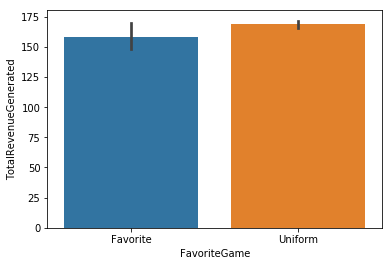

In [25]:
sns.barplot(x="FavoriteGame", y="TotalRevenueGenerated", data=customer_data)

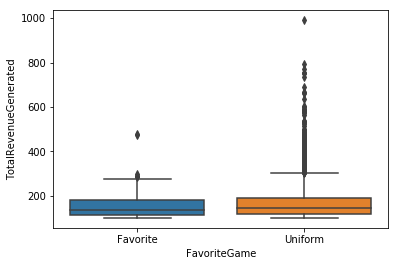

In [26]:
sns.boxplot(x= "FavoriteGame", y= "TotalRevenueGenerated", data = customer_data)

In [27]:
customer_data = pd.get_dummies(customer_data, columns = ["City", "FavoriteChannelOfTransaction","FavoriteGame"],drop_first=True)

In [28]:
customer_data.head(4)

,CustomerID,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
0,1001,2,3,8,210,11,11,2344,108,10,107.51,0,1,1
1,1002,2,3,6,442,20,20,245,22,7,382.40,0,0,1
2,1003,4,3,5,424,18,18,1059,130,18,135.01,0,0,1
3,1004,1,6,6,261,11,9,365,34,11,125.00,0,0,1


In [29]:
customer_data.columns

Index(['CustomerID', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [30]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
CustomerID                              3209 non-null int64
NoOfChildren                            3209 non-null int64
MinAgeOfChild                           3209 non-null int64
MaxAgeOfChild                           3209 non-null int64
Tenure                                  3209 non-null int64
FrquncyOfPurchase                       3209 non-null int64
NoOfUnitsPurchased                      3209 non-null int64
FrequencyOFPlay                         3209 non-null int64
NoOfGamesPlayed                         3209 non-null int64
NoOfGamesBought                         3209 non-null int64
TotalRevenueGenerated                   3209 non-null float64
City_2                                  3209 non-null uint8
FavoriteChannelOfTransaction_Uniform    3209 non-null uint8
FavoriteGame_Uniform                    3209 non-null uint8
dtypes: float64(1), int64(10), uint8(3)
memory usag

In [44]:
customer_data.corr()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
NoOfChildren,1.000000,-0.179176,0.189002,0.085341,0.137630,0.137040,0.165036,0.213342,0.131398,0.107365,-0.065350,0.044500,0.056085
MinAgeOfChild,-0.179176,1.000000,0.367127,-0.055820,-0.017568,-0.006191,0.006690,0.000104,-0.007748,0.024724,0.009865,-0.028402,-0.021148
MaxAgeOfChild,0.189002,0.367127,1.000000,-0.040329,-0.006213,-0.003926,0.012095,0.027947,-0.007062,0.005891,-0.032211,-0.005438,-0.004600
Tenure,0.085341,-0.055820,-0.040329,1.000000,0.193344,0.192413,0.241809,0.273696,0.188285,0.116437,0.052236,-0.001967,0.085138
FrquncyOfPurchase,0.137630,-0.017568,-0.006213,0.193344,1.000000,0.934131,0.279957,0.397567,0.947787,0.663328,-0.099499,0.086129,0.116140
NoOfUnitsPurchased,0.137040,-0.006191,-0.003926,0.192413,0.934131,1.000000,0.311982,0.436149,0.868374,0.750379,-0.066396,-0.006039,0.113322
FrequencyOFPlay,0.165036,0.006690,0.012095,0.241809,0.279957,0.311982,1.000000,0.740204,0.286943,0.233540,0.048818,0.000887,0.138669
NoOfGamesPlayed,0.213342,0.000104,0.027947,0.273696,0.397567,0.436149,0.740204,1.000000,0.399178,0.293995,0.016010,0.018641,0.164413
NoOfGamesBought,0.131398,-0.007748,-0.007062,0.188285,0.947787,0.868374,0.286943,0.399178,1.000000,0.495759,-0.034055,0.071130,0.136982
TotalRevenueGenerated,0.107365,0.024724,0.005891,0.116437,0.663328,0.750379,0.233540,0.293995,0.495759,1.000000,-0.071110,-0.071825,0.025306


In [45]:
customer_data = customer_data.drop(['CustomerID'],axis=1)

KeyError: "['CustomerID'] not found in axis"

In [ ]:
customer_data.info()

In [46]:
customer_data.corr()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
NoOfChildren,1.000000,-0.179176,0.189002,0.085341,0.137630,0.137040,0.165036,0.213342,0.131398,0.107365,-0.065350,0.044500,0.056085
MinAgeOfChild,-0.179176,1.000000,0.367127,-0.055820,-0.017568,-0.006191,0.006690,0.000104,-0.007748,0.024724,0.009865,-0.028402,-0.021148
MaxAgeOfChild,0.189002,0.367127,1.000000,-0.040329,-0.006213,-0.003926,0.012095,0.027947,-0.007062,0.005891,-0.032211,-0.005438,-0.004600
Tenure,0.085341,-0.055820,-0.040329,1.000000,0.193344,0.192413,0.241809,0.273696,0.188285,0.116437,0.052236,-0.001967,0.085138
FrquncyOfPurchase,0.137630,-0.017568,-0.006213,0.193344,1.000000,0.934131,0.279957,0.397567,0.947787,0.663328,-0.099499,0.086129,0.116140
NoOfUnitsPurchased,0.137040,-0.006191,-0.003926,0.192413,0.934131,1.000000,0.311982,0.436149,0.868374,0.750379,-0.066396,-0.006039,0.113322
FrequencyOFPlay,0.165036,0.006690,0.012095,0.241809,0.279957,0.311982,1.000000,0.740204,0.286943,0.233540,0.048818,0.000887,0.138669
NoOfGamesPlayed,0.213342,0.000104,0.027947,0.273696,0.397567,0.436149,0.740204,1.000000,0.399178,0.293995,0.016010,0.018641,0.164413
NoOfGamesBought,0.131398,-0.007748,-0.007062,0.188285,0.947787,0.868374,0.286943,0.399178,1.000000,0.495759,-0.034055,0.071130,0.136982
TotalRevenueGenerated,0.107365,0.024724,0.005891,0.116437,0.663328,0.750379,0.233540,0.293995,0.495759,1.000000,-0.071110,-0.071825,0.025306


In [47]:
customer_data.shape
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 13 columns):
NoOfChildren                            3209 non-null int64
MinAgeOfChild                           3209 non-null int64
MaxAgeOfChild                           3209 non-null int64
Tenure                                  3209 non-null int64
FrquncyOfPurchase                       3209 non-null int64
NoOfUnitsPurchased                      3209 non-null int64
FrequencyOFPlay                         3209 non-null int64
NoOfGamesPlayed                         3209 non-null int64
NoOfGamesBought                         3209 non-null int64
TotalRevenueGenerated                   3209 non-null float64
City_2                                  3209 non-null uint8
FavoriteChannelOfTransaction_Uniform    3209 non-null uint8
FavoriteGame_Uniform                    3209 non-null uint8
dtypes: float64(1), int64(9), uint8(3)
memory usage: 260.2 KB


In [48]:
customer_data.isna().sum()

NoOfChildren                            0
MinAgeOfChild                           0
MaxAgeOfChild                           0
Tenure                                  0
FrquncyOfPurchase                       0
NoOfUnitsPurchased                      0
FrequencyOFPlay                         0
NoOfGamesPlayed                         0
NoOfGamesBought                         0
TotalRevenueGenerated                   0
City_2                                  0
FavoriteChannelOfTransaction_Uniform    0
FavoriteGame_Uniform                    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002766D516828>,
      dtype=object)

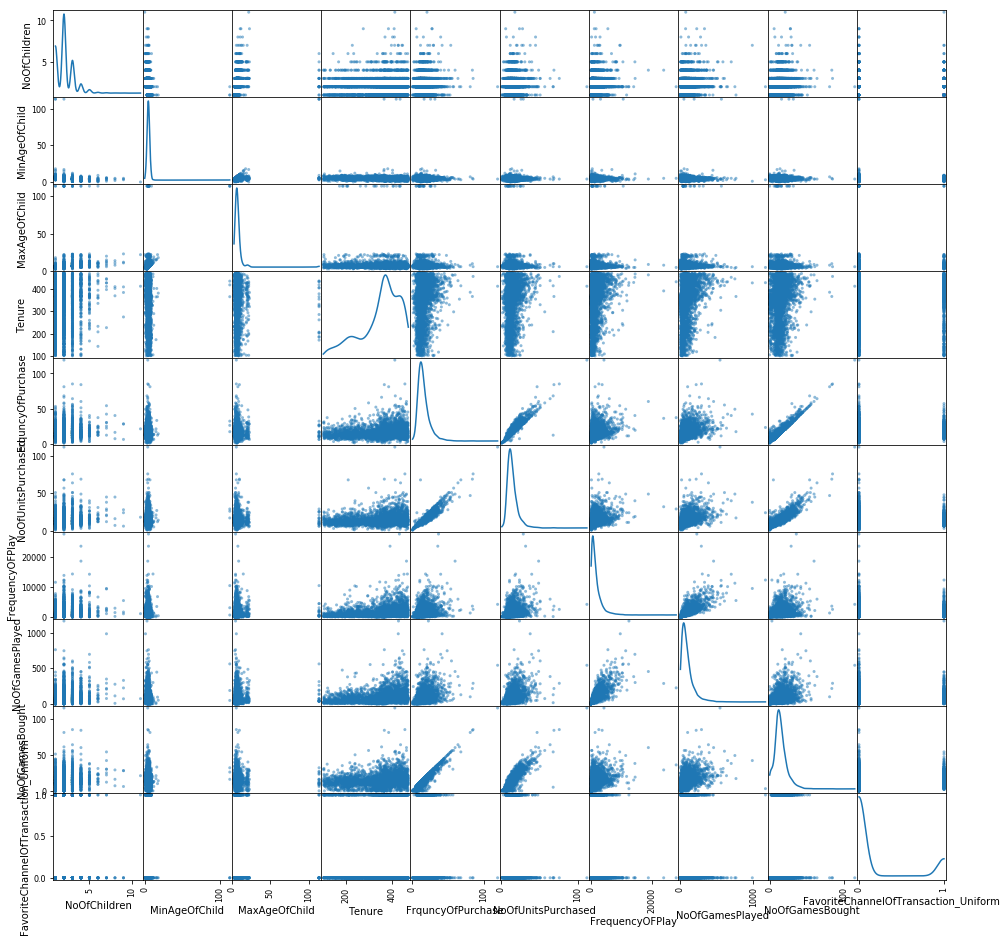

In [49]:
pd.plotting.scatter_matrix(customer_data.iloc[:,[0,1,2,3,4,5,6,7,8,11]],figsize=(16,16),diagonal='kde')

In [134]:
!pip install seaborn

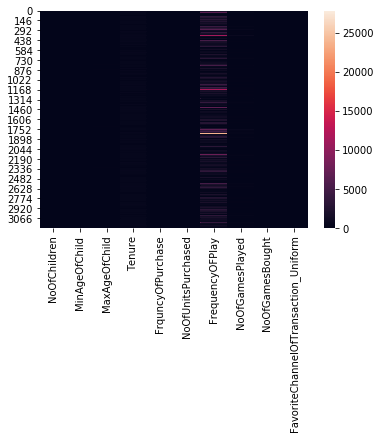

In [50]:
import seaborn as sns
sns.heatmap(customer_data.iloc[:,[0,1,2,3,4,5,6,7,8,11]])

In [40]:
sns.barplot(x= "FavoriteGame", y= "TotalRevenueGenerated", data = customer_data)

ValueError: Could not interpret input 'FavoriteGame'

In [ ]:
customer_data = pd.concat([customer_data.drop('FavoriteGame', axis=1), pd.get_dummies(customer_data['FavoriteGame'])], axis=1)

In [ ]:
customer_data = pd.concat([customer_data.drop('FavoriteChannelOfTransaction', axis=1), pd.get_dummies(customer_data['FavoriteChannelOfTransaction'])], axis=1)

In [84]:
customer_data.head(2)

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,Favorite,Uniform,Favorite,Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,0,1
1,2,3,6,442,20,20,245,22,7,382.40,0,1,1,0


In [51]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 13 columns):
NoOfChildren                            3209 non-null int64
MinAgeOfChild                           3209 non-null int64
MaxAgeOfChild                           3209 non-null int64
Tenure                                  3209 non-null int64
FrquncyOfPurchase                       3209 non-null int64
NoOfUnitsPurchased                      3209 non-null int64
FrequencyOFPlay                         3209 non-null int64
NoOfGamesPlayed                         3209 non-null int64
NoOfGamesBought                         3209 non-null int64
TotalRevenueGenerated                   3209 non-null float64
City_2                                  3209 non-null uint8
FavoriteChannelOfTransaction_Uniform    3209 non-null uint8
FavoriteGame_Uniform                    3209 non-null uint8
dtypes: float64(1), int64(9), uint8(3)
memory usage: 260.2 KB


In [52]:
customer_data.shape

(3209, 13)

In [54]:
customer_data = customer_data.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,9]]

In [55]:
X = customer_data.iloc[:,:-1]
Y = customer_data.iloc[:,-1]

In [56]:
from sklearn import linear_model

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm1 = LinearRegression(Y, X)

In [59]:
reg = linear_model.LinearRegression()

In [60]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 40.600662795617694
Coefficients: 
 [ 2.09143359e+00  9.79280312e-01 -1.29245247e-01 -1.99363882e-02
  1.03123163e+01  9.17751710e+00  2.79782997e-03 -3.71914000e-02
 -1.12239127e+01  1.01387570e+01 -1.43601358e+01 -1.02322186e+01]
